In [319]:
import json
import re
import string

from cltk.tokenize.word import WordTokenizer
from cltk.stem.lemma import LemmaReplacer
from nltk.translate import AlignedSent, Alignment, IBMModel1, IBMModel2
from nltk.tokenize import wordpunct_tokenize
from nltk.translate.ibm_model import AlignmentInfo

In [58]:
lat_tokenizer = WordTokenizer('latin')
eng_tokenizer = wordpunct_tokenize
lem = LemmaReplacer('latin')

In [65]:
def get_sentence_pair(alignments):
    for a in alignments:
        for s in a:
            #for s in p:
            lat_sent = tokenize_sentences(s[0],lat_tokenizer.tokenize)
            eng_sent = tokenize_sentences(s[1], eng_tokenizer)
            yield [lat_sent,eng_sent]

In [66]:
gen = get_sentence_pair(aligned_sentences)

In [67]:
l = next(gen)[0]

In [69]:
lem.lemmatize(l)

['q',
 'mucius',
 'augur',
 'multo2',
 'narro',
 'de',
 'c',
 'laelio',
 'socer',
 'suo',
 'memoriter',
 'et',
 'jucundus',
 'soleo',
 'neque',
 'dubito',
 'ille',
 'in',
 'omne',
 'sermo',
 'appello',
 'sapio']

In [4]:
def tokenize_sentences(sent,tok):
    tokens = []
    if type(sent) == list:
        for s in sent:
            s = re.sub(r'[{}]'.format(string.punctuation),'',s).lower()
            s = re.sub(r'  *', ' ', s)
            tokens += tok(s.lower())
    else:
        sent = re.sub(r'[{}]'.format(string.punctuation),'',sent).lower()
        sent = re.sub(r'  *', ' ', sent)
        tokens += tok(sent)
        
    return tokens

In [137]:
f = open('../aligned_sentences/cicero_lael_friendship_sentences.json')
aligned_sentences = json.loads(f.read())
f.close()

In [200]:
lem.lemmatize('regina')

['regina']

In [139]:
#bitext = []
for a in aligned_sentences:
    for s in a:
        #for s in p:
        lat_sent = tokenize_sentences(s[0],lat_tokenizer.tokenize)
        #while '' in lat_sent:
        #    lat_sent.remove('')
        #lat_sent = lem.lemmatize(lat_sent)
        eng_sent = tokenize_sentences(s[1], eng_tokenizer)
        if len(lat_sent) == 0 or len(eng_sent) == 0:
            continue
        bitext.append(AlignedSent(lem.lemmatize(lat_sent),eng_sent))

In [141]:
mod = IBMModel2(bitext,5)

In [214]:
mod.best_model2_alignment(AlignedSent(['puer','amat','puellam'],['boy','loves','girl']))

In [313]:
a = Alignment([(0,0),(1,1),(2,2)])

In [364]:
al = [AlignedSent(['puer','amat','puellam'],['boy','loves','girl'])]

In [444]:
water = mod.translation_table['imperator']

import operator

sorted_x = sorted(water.items(), key=operator.itemgetter(1),reverse=True)

sorted_x

[('emperor', 0.6311846777216015),
 ('generalissimo', 0.49849114133611094),
 ('thirtytwo', 0.31573853389016254),
 ('emperors', 0.29090469031501087),
 ('exulting', 0.2001961016022609),
 ('appius', 0.18575543082718185),
 ('constantines', 0.17605796155057743),
 ('honour', 0.1759246489581581),
 ('fancies', 0.16929363793489902),
 ('generals', 0.16556480132228257),
 ('general', 0.15736909131060173),
 ('institution', 0.1366787334919364),
 ('sire', 0.12498088965250585),
 ('molest', 0.11620852250086694),
 ('votes', 0.11566070375587091),
 ('pest', 0.11289931995219263),
 ('tongres', 0.10744871015257865),
 ('menophilus', 0.10363254188781364),
 ('imperator', 0.10041456599271013),
 ('martinus', 0.09142434652477431),
 ('minor', 0.08384780198011114),
 ('dacia', 0.08224471087905723),
 ('petobio', 0.0818717588207609),
 ('timidly', 0.08078618157414894),
 ('strives', 0.07765450956873789),
 ('went', 0.07579010867428478),
 ('honours', 0.06424304436488425),
 ('assisted', 0.0639907473648193),
 ('conducting', 0

In [265]:
l.alignment

(0, 1, 0, 2)

In [217]:
l.src_sentence

(None, 'boy', 'loves', 'girl')

In [218]:
l.trg_sentence

('UNUSED', 'puer', 'amat', 'puellam')

In [71]:
bitext[3].alignment

Alignment([(0, 3), (1, 63), (2, 5), (3, 50), (4, 50), (5, 6), (6, 12), (7, 3), (8, 21), (9, 24), (10, 23), (11, 19), (12, 20), (13, 63), (14, 50), (15, 30), (16, 6), (17, 72), (18, 3), (19, 6), (20, 36), (21, 55), (22, 3), (23, 41), (24, 54), (25, 63), (26, 74), (27, 3), (28, 35), (29, 6), (30, 46), (31, 54), (32, 3), (33, 47), (34, 50), (35, 50), (36, 62), (37, 3), (38, 66), (39, 78), (40, 20), (41, 67), (42, 77), (43, 79), (44, 64), (45, 3)])

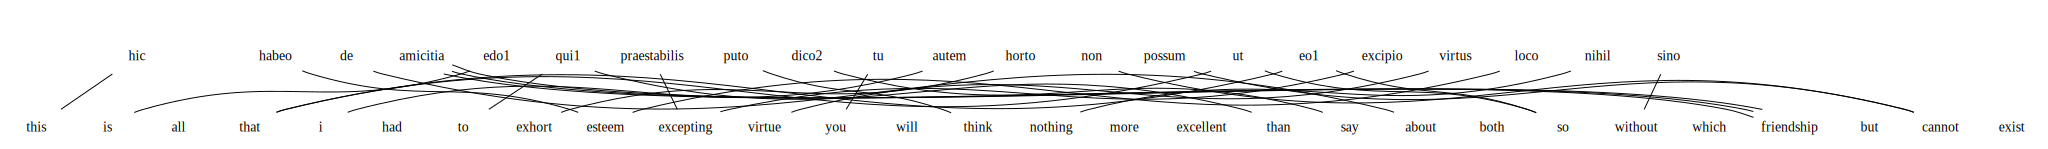

In [150]:
bitext[-1]

In [167]:
b = -6000
for a in bitext[b].alignment:
    w = a[0]
    m = a[1]
    if w == None:
        word = 'None'
    else:
        word = bitext[b].words[w]
    if m == None:
        mot = 'None'
    else:
        mot = bitext[b].mots[a[1]]
        
    print('{} : {}'.format(word,mot))

quisque : created
rex : king
hic : them
constituo : created
liberalis1 : liberally
domus : subduing
consilium : subduing
polliceo : promising
edo1 : be
supero : subduing
cum : with
auctoritas : influence
qui1 : whom
et : and
eo1 : those
ibi : there
qui1 : whom
virtus : courage
et : and
-que : and
mitto : sends
atrebatibus : subduing
suo : own
in : in
qui1 : whom
ut : that
qui1 : whom
horto : exhorting
magnus : created
ipse : own
habeo : esteemed
permaneo : continue
audio : audience
fidelis : faithful
commis : commius
et : and
sententia : subduing
remitto : back
unus : audience
arbitror : audience
eo1 : those
et : and
eo1 : those
regius : country
in : in
probo : subduing


In [165]:
bitext[-900].words

['quidam',
 'cataplasmo',
 'calfacientibus',
 'uto',
 'eo1',
 'multus',
 'pondus',
 'noceo',
 'quis1',
 'vesica',
 'urgeo',
 'vulnus',
 'irrito1',
 'qui1',
 'calor1',
 'proficio']

In [70]:
for b in range(len(bitext)):
    for a in bitext[b].alignment:
        print('{} : {}'.format(bitext[b].words[a[0]],bitext[b].mots[a[1]]))

per : by
iuvant : incursion
ordinatus : reconnoitring
bellis : involved
eum : him
moventem : incursion
dederit : makes
mesopotamiam : mesopotamia
nostra : territories
quadam : policy
ferocissimas : stage
isauriam : incursion
arma : frontiers


TypeError: list indices must be integers or slices, not NoneType

In [58]:
bitext[3].words[8]

'ab'

In [59]:
bitext[3].mots[60]

'from'

In [23]:
mod = IBMModel1.train(bitext)

TypeError: train() missing 1 required positional argument: 'parallel_corpus'

In [16]:
mod.translation_table['rex']['king']

0.5675554043221417

In [287]:
mod.translation_table['regina']['queen']

0.6156239752345138

In [279]:
mod.prob_of_alignments(['hic','puer','amat'],['this','boy','loves'],[(0, 0), (1, 1), (2, 2), (3, None), (4, 3)])

TypeError: prob_of_alignments() takes 2 positional arguments but 4 were given

In [297]:
mod.align(bitexts[0])

AttributeError: 'IBMModel2' object has no attribute 'align'

In [295]:
al_s = AlignedSent(['puer','amat','puellam'],['the','boy','loves','the','girl'],a)

In [293]:
a = Alignment([(0,1),(1,2),(2,4)])

In [298]:
bitext[0].src_sentence

AttributeError: 'AlignedSent' object has no attribute 'src_sentence'